In [40]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
import numpy as np

### Wczytanie już poprawnie przetworzonych danych

In [4]:
df = pd.read_json(path_or_buf='../../data/processed/dataset.jsonl')

In [5]:
df.head()

,purchased,offered_discount,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,Gry Xbox 360,...,Zestawy głośnomówiące,Zestawy słuchawkowe,Female,Male,session_length,n_views,month,day,hour,dayofweek
0,1,5,199.98,0,0,0,0,0,0,0,...,0,0,1,0,725,1,8,26,22,3
1,1,0,36664.54,0,0,0,9,9,0,0,...,0,0,1,0,1547,8,3,8,8,0
2,1,15,222.60,0,0,0,0,0,0,0,...,0,0,1,0,347,2,2,16,17,1
3,1,0,208.50,0,0,0,0,0,0,0,...,0,0,1,0,457,2,3,13,6,5
4,1,0,568.94,0,0,0,0,0,0,7,...,0,0,1,0,1010,6,4,18,21,6


### Oddzielenie zmiennej celu od pozostałych atrybutów

In [6]:
y = df['purchased'].values
X = df.drop(columns=['purchased'])

In [9]:
X.head()

,offered_discount,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,Gry Xbox 360,Gry i konsole,...,Zestawy głośnomówiące,Zestawy słuchawkowe,Female,Male,session_length,n_views,month,day,hour,dayofweek
0,5,199.98,0,0,0,0,0,0,0,0,...,0,0,1,0,725,1,8,26,22,3
1,0,36664.54,0,0,0,9,9,0,0,0,...,0,0,1,0,1547,8,3,8,8,0
2,15,222.60,0,0,0,0,0,0,0,0,...,0,0,1,0,347,2,2,16,17,1
3,0,208.50,0,0,0,0,0,0,0,0,...,0,0,1,0,457,2,3,13,6,5
4,0,568.94,0,0,0,0,0,0,7,7,...,0,0,1,0,1010,6,4,18,21,6


In [11]:
y[:5]

array([1, 1, 1, 1, 1])

### Podział zbioru danych na zbiór treningowy i testowy

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
X_test.shape

(2821, 38)

In [14]:
X_train.shape

(6582, 38)

## Analiza modeli

### Las losowy

In [15]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rand_forest_scores = cross_val_score(random_forest, X_test, y_test, cv=10, scoring="accuracy")
rand_forest_scores.mean()

0.9234305691301407

### KNN

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
knn_forest_scores = cross_val_score(knn, X_test, y_test, cv=10, scoring="accuracy")
knn_forest_scores.mean()

0.7015236949602787

### SVM

In [19]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

SVC()

In [32]:
svm_scores = cross_val_score(svm, X_test, y_test, cv=10, scoring="accuracy")
svm_scores.mean()

0.6022755181314688

### Gradient Boosting

In [21]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
gradient_boosting_scores = cross_val_score(gradient_boosting, X_test, y_test, cv=3, scoring="accuracy")
gradient_boosting_scores.mean()

0.90499807809709

### Sieć neuronowa

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=len(df.columns)-1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

2022-01-08 00:09:31.986305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 00:09:31.992252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-01-08 00:09:31.992273: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-01-08 00:09:31.992917: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4992      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [27]:
model.fit(np.array(X_train, dtype=np.float64), np.array(y_train,dtype=np.float64), epochs=200)

Epoch 1/200
206/206 [==============================] - 0s 622us/step - loss: 13.1128 - accuracy: 0.5345
Epoch 2/200
206/206 [==============================] - 0s 621us/step - loss: 8.2611 - accuracy: 0.5500
Epoch 3/200
206/206 [==============================] - 0s 638us/step - loss: 4.6262 - accuracy: 0.5573
Epoch 4/200
206/206 [==============================] - 0s 630us/step - loss: 2.8240 - accuracy: 0.5766
Epoch 5/200
206/206 [==============================] - 0s 613us/step - loss: 1.5583 - accuracy: 0.5940
Epoch 6/200
206/206 [==============================] - 0s 626us/step - loss: 2.5626 - accuracy: 0.5833
Epoch 7/200
206/206 [==============================] - 0s 604us/step - loss: 1.8092 - accuracy: 0.5962
Epoch 8/200
206/206 [==============================] - 0s 611us/step - loss: 1.1681 - accuracy: 0.6161
Epoch 9/200
206/206 [==============================] - 0s 611us/step - loss: 1.1131 - accuracy: 0.6155
Epoch 10/200
206/206 [==============================] - 0s 624us/step - 

In [36]:
predictions_train = model.predict(np.array(X_train,dtype=np.float64)) > 0.5

In [37]:
predictions_test = model.predict(np.array(X_test,dtype=np.float64)) > 0.5

In [38]:
accuracy_score(y_test, predictions_test)

0.9269762495568947

In [35]:
model.save('../../models/nn')

INFO:tensorflow:Assets written to: ../../models/nn/assets


In [42]:
cm_test = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test))
cm_train = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train))

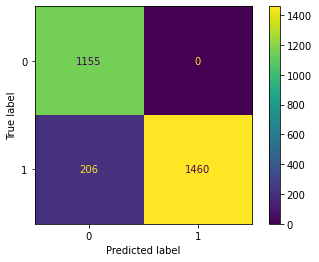

In [43]:
cm_test.plot()

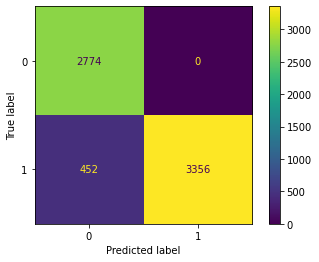

In [44]:
cm_train.plot()

In [46]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1155
           1       1.00      0.88      0.93      1666

    accuracy                           0.93      2821
   macro avg       0.92      0.94      0.93      2821
weighted avg       0.94      0.93      0.93      2821



In [47]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2774
           1       1.00      0.88      0.94      3808

    accuracy                           0.93      6582
   macro avg       0.93      0.94      0.93      6582
weighted avg       0.94      0.93      0.93      6582



## Wnioski:
Wybraliśmy sieć neuronową ponieważ osiągnęła ona najlepsze wyniki.